In [0]:
import numpy as np
import tensorflow as tf
import tensorflow.keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import imageio
from pathlib import Path
import tensorflow_datasets as tfds

In [0]:
#(x_train, y_train), (x_test, y_test) = mnist.load_data()
(x_train, y_train), (x_test, y_test) = tfds.as_numpy(tfds.load('omniglot', split=['train', 'test'] ,as_supervised=True, batch_size=-1))


In [0]:
class GAN:
  def __init__(self, numbers, epochs=100, batch_size=20, input_layer_size_g=100, hidden_layer_size_g=128, hidden_layer_size_d=128, learning_rate=1e-3, decay_rate=1e-4, image_size=28, create_gif=True):
    self.numbers = numbers
    self.epochs = epochs
    self.batch_size = batch_size
    self.nh_g = hidden_layer_size_g
    self.nx_g = input_layer_size_g
    self.nh_d = hidden_layer_size_d
    self.lr = learning_rate
    self.dr = decay_rate
    self.image_size = image_size
    self.create_gif = create_gif

    self.image_dir = Path('./GAN_sample_image')

    if not self.image_dir.is_dir():
      self.image_dir.mkdir()
    
    self.filenames = []


    self.W0_g = np.random.randn(self.nx_g, self.nh_g)*np.sqrt(2./self.nx_g) 
    self.b0_g = np.zeros((1, self.nh_g))
    self.W1_g = np.random.randn(self.nh_g, self.image_size**2)*np.sqrt(2./self.nh_g)
    self.b1_g = np.zeros((1, self.image_size**2))

    self.W0_d = np.random.randn(self.image_size**2, self.nh_d)*np.sqrt(2./self.image_size**2)
    self.b0_d = np.zeros((1, self.nh_d))
    self.W1_d = np.random.randn(self.nh_d, 1)*np.sqrt(2./self.nh_d)
    self.b1_d = np.zeros((1,1))



In [0]:
def preprocess_omniglot(self, x_train_i, y_train_i):
  x_train_i = tf.image.rgb_to_grayscale(x_train_i)
  x_train_i = tf.image.resize_with_crop_or_pad(x_train_i[0], 28, 28)
  x_train_i = tf.reshape(x_train_i, (x_train_i.shape[0], 784))
  x_train_i = (tf.cast(x_train_i, tf.float32))/255.


  x_train_final = []
  y_train_final = []

  for i in range(x_train.shape[0]):
    if y_train[i] == 617:
      x_train_final.append(x_train_i[i])
      y_train_final.append(y_train_i[i])
      plt.imshow(x_train[i])
      plt.xlabel(y_train[i])
      plt.show()

  x_train_final = np.array(x_train_final)
  y_train_final = np.array(y_train_final)
  return x_train_final, y_train_final, 1

GAN.preprocess_omniglot = preprocess_omniglot

In [78]:
'''x_train_final, y_train_final = preprocess_omniglot(x_train, train_label)

unique, _, counts = tf.unique_with_counts(y_train_final)
for i in range(len(counts)):
  print(f"label{unique[i]:} /// counts={counts[i]:}")
print(x_train_final.shape)
print(y_train_final.shape)'''

'x_train_final, y_train_final = preprocess_omniglot(x_train, train_label)\n\nunique, _, counts = tf.unique_with_counts(y_train_final)\nfor i in range(len(counts)):\n  print(f"label{unique[i]:} /// counts={counts[i]:}")\nprint(x_train_final.shape)\nprint(y_train_final.shape)'

In [79]:
'''def preprocess_data(self, x, y):
  x_train=[]
  y_train=[]

      #Use this for a single image. Comment out The part under.

  for i in range(y.shape[0]):
    if y[i] == numbers:
      x_train.append(x[i])
      y_train.append(y[i])

  x_train = np.array(x_train)
  y_train = np.array(y_train)

  num_batches = x_train.shape[0] // self.batch_size
  x_train = x_train[: num_batches * self.batch_size]
  y_train = y_train[: num_batches * self.batch_size]

  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1]*x_train.shape[2]))
  x_train = (x_train.astype(np.float32) - 127.5)/127.5

  idx = np.random.permutation(len(x_train))
  x_train, y_train = x_train[idx], y_train[idx]

  return x_train, y_train, num_batches

GAN.preprocess_data = preprocess_data'''


'def preprocess_data(self, x, y):\n  x_train=[]\n  y_train=[]\n\n      #Use this for a single image. Comment out The part under.\n\n  for i in range(y.shape[0]):\n    if y[i] == numbers:\n      x_train.append(x[i])\n      y_train.append(y[i])\n\n  x_train = np.array(x_train)\n  y_train = np.array(y_train)\n\n  num_batches = x_train.shape[0] // self.batch_size\n  x_train = x_train[: num_batches * self.batch_size]\n  y_train = y_train[: num_batches * self.batch_size]\n\n  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1]*x_train.shape[2]))\n  x_train = (x_train.astype(np.float32) - 127.5)/127.5\n\n  idx = np.random.permutation(len(x_train))\n  x_train, y_train = x_train[idx], y_train[idx]\n\n  return x_train, y_train, num_batches\n\nGAN.preprocess_data = preprocess_data'

In [0]:
def sigmoid(self, z):
  return 1./(1.+np.exp(-z))

GAN.sigmoid = sigmoid

def dsigmoid(self, z):
  y = self.sigmoid(z)
  return y*(1.-y)

def relu(self, z):
  return np.maximum(z, 0)

def lrelu(self, z, alpha=1e-2):
  return np.maximum(z, z*alpha)

def dlrelu(self, z, alpha=1e-2):
  dz=np.ones_like(z)
  dz[z<0] = alpha
  return dz

def drelu(self, z, alpha):
  dz=np.ones_like(z)
  dz[z<0] = 0
  return dz

def dtanh(self, z):
  return 1 - np.tanh(z)**2


GAN.dsigmoid = dsigmoid
GAN.lrelu = lrelu
GAN.dlrelu = dlrelu
GAN.dtanh = dtanh


In [0]:
def forward_generator(self, z):
  self.z0_g = np.dot(z, self.W0_g) + self.b0_g
  self.a0_g = self.lrelu(self.z0_g, alpha=0)

  self.z1_g = np.dot(self.a0_g, self.W1_g) + self.b1_g
  self.a1_g = np.tanh(self.z1_g)

  return self.z1_g, self.a1_g

GAN.forward_generator = forward_generator

In [0]:
def forward_discriminator(self, x):
  self.z0_d = np.dot(x, self.W0_d) + self.b0_d
  self.a0_d = lrelu(self, self.z0_d)

  self.z1_d = np.dot(self.a0_d, self.W1_d) + self.b1_d
  self.a1_d = self.sigmoid(self.z1_d)

  return self.z1_d, self.a1_d


GAN.forward_discriminator = forward_discriminator

In [0]:
def backward_discriminator(self, x_real, z1_real, a1_real, x_fake, z1_fake, a1_fake):


    # J_D = np.mean(-np.log(a1_real) - np.log(1 - a1_fake))

    da1_real = -1. / (a1_real + 1e-8)  # 64x1

    dz1_real = da1_real * self.dsigmoid(z1_real)  # 64x1
    dW1_real = np.dot(self.a0_d.T, dz1_real)
    db1_real = np.sum(dz1_real, axis=0, keepdims=True)

    da0_real = np.dot(dz1_real, self.W1_d.T)
    dz0_real = da0_real * self.dlrelu(self.z0_d)
    dW0_real = np.dot(x_real.T, dz0_real)
    db0_real = np.sum(dz0_real, axis=0, keepdims=True)


    da1_fake = 1. / (1. - a1_fake + 1e-8)

    dz1_fake = da1_fake * self.dsigmoid(z1_fake)
    dW1_fake = np.dot(self.a0_d.T, dz1_fake)
    db1_fake = np.sum(dz1_fake, axis=0, keepdims=True)

    da0_fake = np.dot(dz1_fake, self.W1_d.T)
    dz0_fake = da0_fake * self.dlrelu(self.z0_d, alpha=0)
    dW0_fake = np.dot(x_fake.T, dz0_fake)
    db0_fake = np.sum(dz0_fake, axis=0, keepdims=True)


    dW1 = dW1_real + dW1_fake
    db1 = db1_real + db1_fake

    dW0 = dW0_real + dW0_fake
    db0 = db0_real + db0_fake

    #Gradient desent
    self.W0_d -= self.lr * dW0
    self.b0_d -= self.lr * db0

    self.W1_d -= self.lr * dW1
    self.b1_d -= self.lr * db1
    
GAN.backward_discriminator = backward_discriminator


In [0]:
def backward_generator(self, z, x_fake, z1_fake, a1_fake):


    # J_D = np.mean(-np.log(a1_real) - np.log(1 - a1_fake))

    da1_d = -1.0 / (a1_fake + 1e-8)  # 64x1

    dz1_d = da1_d * self.dsigmoid(z1_fake)
    da0_d = np.dot(dz1_d, self.W1_d.T)
    dz0_d = da0_d * self.dlrelu(self.z0_d)
    dx_d = np.dot(dz0_d, self.W0_d.T)


    dz1_g = dx_d * self.dtanh(self.z1_g)
    dW1_g = np.dot(self.a0_g.T, dz1_g)
    db1_g = np.sum(dz1_g, axis=0, keepdims=True)

    da0_g = np.dot(dz1_g, self.W1_g.T)
    dz0_g = da0_g * self.dlrelu(self.z0_g, alpha=0)
    dW0_g = np.dot(z.T, dz0_g)
    db0_g = np.sum(dz0_g, axis=0, keepdims=True)

    #Grad descent
    self.W0_g -= self.lr * dW0_g
    self.b0_g -= self.lr * db0_g

    self.W1_g -= self.lr * dW1_g
    self.b1_g -= self.lr * db1_g
    
GAN.backward_generator = backward_generator

In [0]:
def train(self, x, y):
    J_Ds = [] 
    J_Gs = []  

    x_train, y_train, num_batches = self.preprocess_omniglot(x, y)
    print(x_train.shape)
    print(y_train.shape)
    print(num_batches)

    for epoch in range(self.epochs):
        for i in range(num_batches):
            self.lr = self.lr * (1.0 / (1.0 + self.dr * epoch))

            x_real = x_train[i * self.batch_size: (i + 1) * self.batch_size]
            z = np.random.normal(0, 1, size=[self.batch_size, self.nx_g]) 

            z1_g, x_fake = self.forward_generator(z)

            z1_d_real, a1_d_real = self.forward_discriminator(x_real)
            z1_d_fake, a1_d_fake = self.forward_discriminator(x_fake)

            J_D = np.mean(-np.log(a1_d_real) - np.log(1 - a1_d_fake))
            J_Ds.append(J_D)

            J_G = np.mean(-np.log(a1_d_fake))
            J_Gs.append(J_G)

            self.backward_discriminator(x_real, z1_d_real, a1_d_real,
                                        x_fake, z1_d_fake, a1_d_fake)
            self.backward_generator(z, x_fake, z1_d_fake, a1_d_fake)

        if epoch % 50 == 0:
            print(f"Epoch:{epoch:}|G loss:{J_G:.4f}|D loss:{J_D:.4f}|D(G(z))avg:{np.mean(a1_d_fake):.4f}|D(x)avg:{np.mean(a1_d_real):.4f}|LR:{self.lr:.6f}")
            self.sample_images(x_fake, epoch, show=True) 
        else:
            self.sample_images(x_fake, epoch, show=False)
    
        #self.lr = self.lr * (1.0 / (1.0 + self.dr * epoch))

    return J_Ds, J_Gs

GAN.train = train

In [0]:
def sample_images(self, images, epoch, show):
    images = np.reshape(images, (self.batch_size, self.image_size, self.image_size))
    
    fig = plt.figure(figsize=(4, 4))

    for i in range(16):
        plt.subplot(4, 4, i + 1)
        plt.imshow(images[i] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')

    # saves generated images in the GAN_sample_images folder
    if self.create_gif:
        current_epoch_filename = self.image_dir.joinpath(f"GAN_epoch{epoch}.png")
        self.filenames.append(current_epoch_filename)
        plt.savefig(current_epoch_filename)

    if show == True:
        plt.show()
    else:
        plt.close()

GAN.sample_images = sample_images

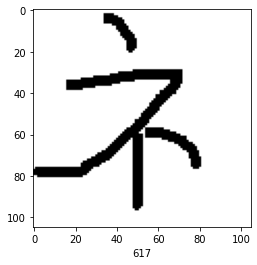

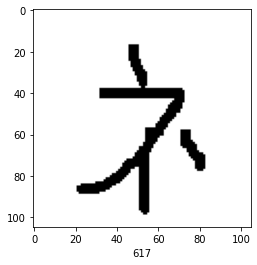

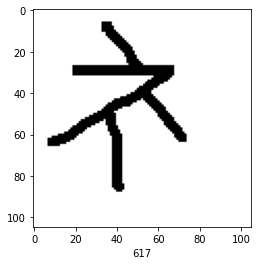

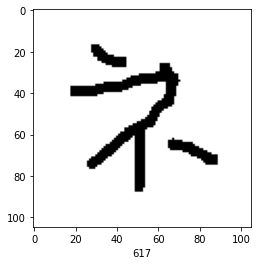

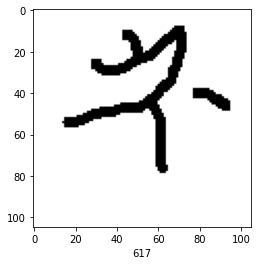

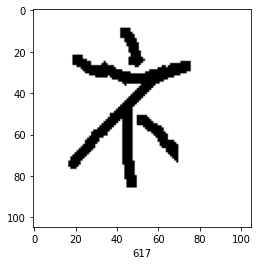

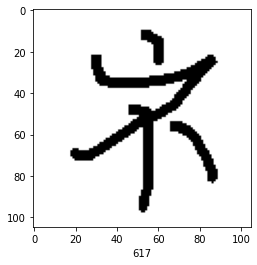

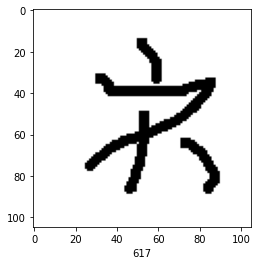

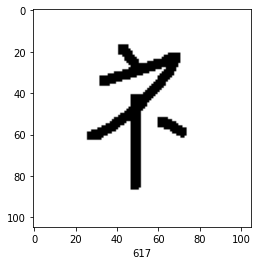

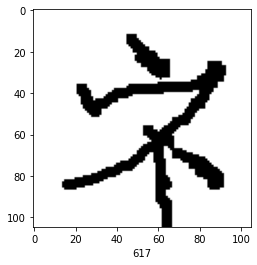

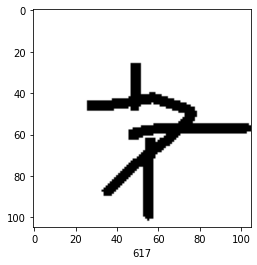

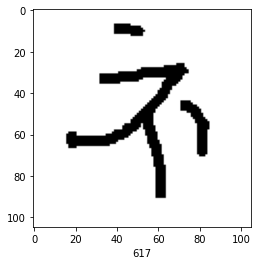

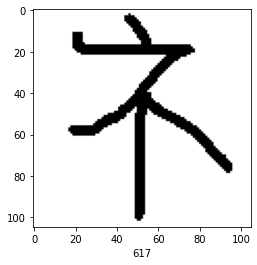

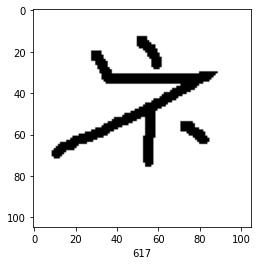

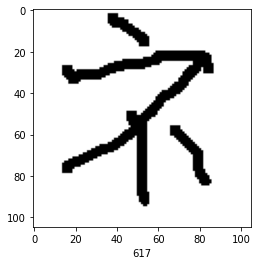

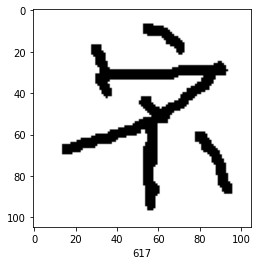

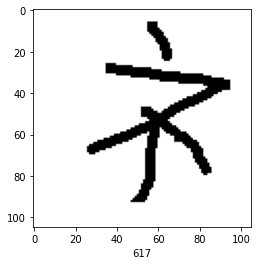

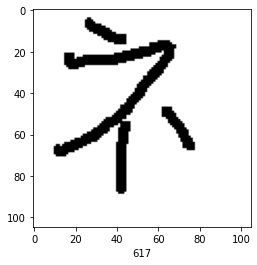

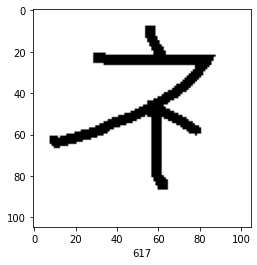

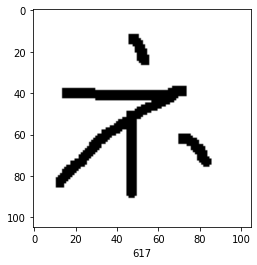

(20, 784)
(20,)
1
Epoch:0|G loss:1.1088|D loss:2.2927|D(G(z))avg:0.3530|D(x)avg:0.1793|LR:0.010000


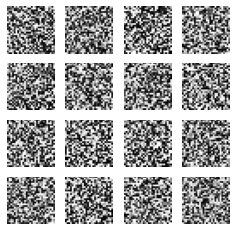

Epoch:50|G loss:0.9282|D loss:0.9965|D(G(z))avg:0.3960|D(x)avg:0.6130|LR:0.007791


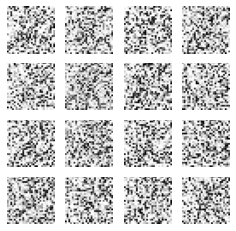

Epoch:100|G loss:0.7871|D loss:1.2161|D(G(z))avg:0.4554|D(x)avg:0.5448|LR:0.003691


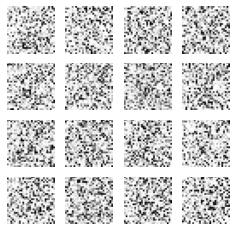

Epoch:150|G loss:0.7517|D loss:1.2815|D(G(z))avg:0.4717|D(x)avg:0.5262|LR:0.001066


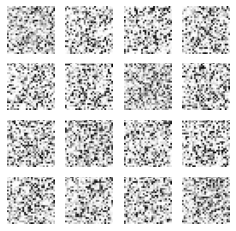

Epoch:200|G loss:0.7415|D loss:1.2938|D(G(z))avg:0.4768|D(x)avg:0.5250|LR:0.000188


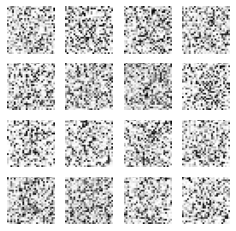

Epoch:250|G loss:0.7255|D loss:1.3080|D(G(z))avg:0.4843|D(x)avg:0.5250|LR:0.000020


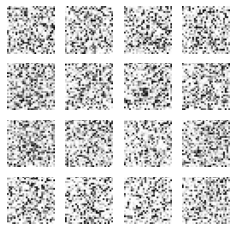

Epoch:300|G loss:0.7385|D loss:1.2969|D(G(z))avg:0.4783|D(x)avg:0.5250|LR:0.000001


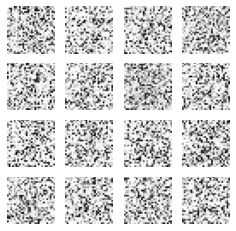

Epoch:350|G loss:0.7385|D loss:1.2961|D(G(z))avg:0.4781|D(x)avg:0.5250|LR:0.000000


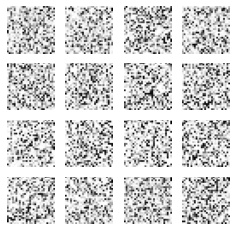

Epoch:400|G loss:0.7488|D loss:1.2868|D(G(z))avg:0.4732|D(x)avg:0.5250|LR:0.000000


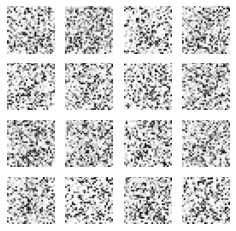

Epoch:450|G loss:0.7258|D loss:1.3077|D(G(z))avg:0.4842|D(x)avg:0.5250|LR:0.000000


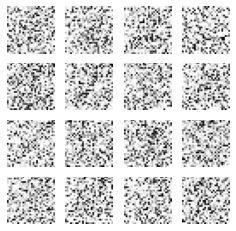

In [88]:
numbers = [614]
model = GAN(numbers, learning_rate = 1e-2, decay_rate = 1e-4, epochs = 500)
J_Ds, J_Gs = model.train(x_train, y_train)

In [0]:
plt.plot([i for i in range(len(J_Ds))], J_Ds)
plt.plot([i for i in range(len(J_Gs))], J_Gs)

plt.xlabel("# training steps")
plt.ylabel("training cost")
plt.legend(['Discriminator', 'Generator'])
plt.show()